In [69]:
!pip install -r requirements.txt --quiet

In [70]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Matplotlib settings
matplotlib.rcParams['axes.labelsize'] = 16          # fontsize of the x and y labels
matplotlib.rcParams['axes.titlesize'] = 21          # fontsize of the title
matplotlib.rcParams['xtick.labelsize'] = 15         # fontsize of the tick labels on the x-axis
matplotlib.rcParams['ytick.labelsize'] = 15         # fontsize of the tick labels on the y-axis
matplotlib.rcParams['figure.figsize'] = (10, 8)     # plot size
matplotlib.rcParams['legend.title_fontsize'] = 16   # fontsize of the legend title
matplotlib.rcParams['legend.fontsize'] = 14         # fontsize of the legend classes

## 1. Preparação e entendimento dos dados

In [4]:
df = pd.read_csv("../Dataset/Sleep_health_and_lifestyle_dataset.csv")
print(df.shape)

(374, 13)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
num_null = df.isnull().sum().sum()
num_duplicates = df.duplicated().sum()

print(f"Número de células nulas: {num_null}")
print(f"Número de duplicatas: {num_duplicates}")

Número de células nulas: 0
Número de duplicatas: 0


- Dataset tem 374 linhas
- Não há células nulas nem duplicatas

Dataset Columns:

Person ID: An identifier for each individual.

Gender: The gender of the person (Male/Female).

Age: The age of the person in years.

Occupation: The occupation or profession of the person.

Sleep Duration (hours): The number of hours the person sleeps per day.

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

Heart Rate (bpm): The resting heart rate of the person in beats per minute.

Daily Steps: The number of steps the person takes per day.

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [8]:
# Sumário das variáveis numéricas
df.describe().round(2)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,187.50,42.18,7.13,7.31,59.17,5.39,70.17,6816.84
std,108.11,8.67,0.80,1.20,20.83,1.77,4.14,1617.92
min,1.00,27.00,5.80,4.00,30.00,3.00,65.00,3000.00
25%,94.25,35.25,6.40,6.00,45.00,4.00,68.00,5600.00
50%,187.50,43.00,7.20,7.00,60.00,5.00,70.00,7000.00
75%,280.75,50.00,7.80,8.00,75.00,7.00,72.00,8000.00
max,374.00,59.00,8.50,9.00,90.00,8.00,86.00,10000.00


- Idades entre 27 e 59 anos => dados referentes à adultos
- Duração de sono entre 5.8 e 8.5 horas

In [9]:
# Sumário das variáveis categóricas
df.describe(include=['object'])

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,195,99,219


#### Tratamentos iniciais

In [10]:
# Erro de digitação: Normal Weight => Underweight
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Underweight')
df['BMI Category'] = df['BMI Category'].replace('Obese', 'Overweight')

# Sleep disorder = None => No disorder
df['Sleep Disorder'] = df['Sleep Disorder'].replace('None', 'No Disorder')

### 1.1. Entendimento (variáveis numéricas)

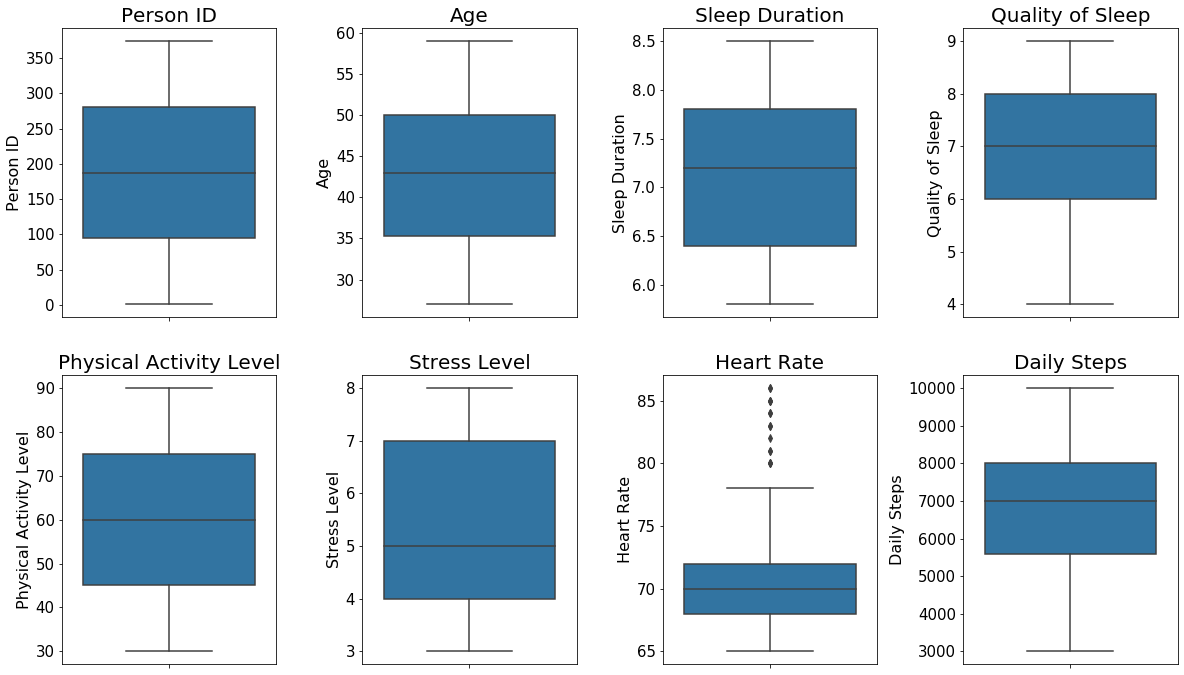

In [35]:
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(20, 50))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 4, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'{col}', fontsize=20)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.2)

plt.show()

- Obs: ocorrência de outliers na coluna "Heart Rate"

### 1.2. Entendimento (variáveis categóricas)

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')

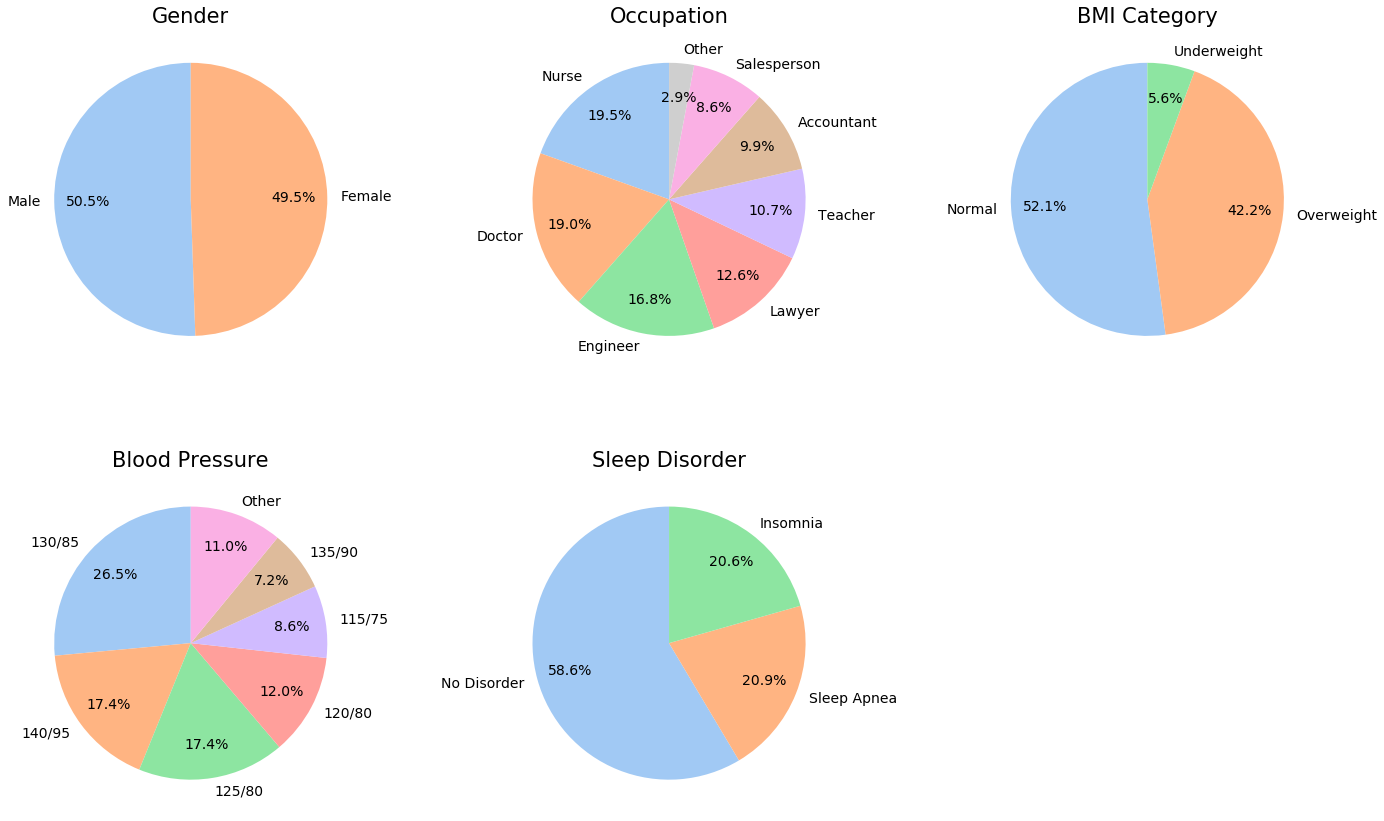

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns

fig = plt.figure(figsize=(20, 30))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 3, i)
    counts = df[col].value_counts()
    total = counts.sum()
    
    # Calculate percentages
    percentages = counts / total * 100
    
    # Separate out the small categories
    small_categories = percentages[percentages < 2.5]
    large_categories = percentages[percentages >= 2.5]
    
    # Add "Other" category if there are small categories
    if not small_categories.empty:
        counts = large_categories.append(pd.Series(small_categories.sum(), index=['Other']))
    else:
        counts = large_categories
    
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', pctdistance=.75, startangle=90, colors=sns.color_palette('pastel'), textprops={'fontsize': 14})
    plt.title(f'{col}')

fig.set_facecolor('white')
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

- Gender: bem distribuido
- Occupation: 7 tipos diferentes de profissões com uma amostra mínima para análise (demais serão descartadas em análises envolvendo exclusivamente profissões)
- BMI Category: "Normal Weight" provavelmente teve erro de digitação e se refere à categoria "Underweight"
- Blood Pressure: várias classes distintas
- Sleep Disorder: 3 grupos (Sem problemas de sono, apneia do sono e insônia). Nenhum grupo possui uma amostra muito pequena, permitindo a análise de todos os grupos apresentados

In [14]:
df["Occupation"].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [15]:
df["BMI Category"].value_counts()

Normal         195
Overweight     158
Underweight     21
Name: BMI Category, dtype: int64

In [16]:
df["Blood Pressure"].value_counts()

130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
125/82     4
140/90     4
132/87     3
128/85     3
135/88     2
118/75     2
142/92     2
115/78     2
128/84     2
117/76     2
131/86     2
129/84     2
130/86     2
139/91     2
119/77     2
126/83     2
118/76     1
122/80     1
121/79     1
Name: Blood Pressure, dtype: int64

In [17]:
df["Sleep Disorder"].value_counts()

No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

### Sobre o dataset

- Registros de 374 pessoas adultas;
- 7 variáveis numéricas: Idade, Horas de Sono, Qualidade do Sono (0 a 10), Tempo de atividade física (min/dia), Nível de estresse (0 a 10), Batimento cardíaco (bpm), Número de passos diários;
- 5 variáveis categóricas: Gênero, Profissão, Índice de massa corporal (classificação em vez do valor), Pressão arterial, Distúrbio do sono;
- 3 classes de distúrbios do sono: sem distúrbio, apneia do sono e insônia.

## 2. Análises

### 2.1. Análises entre variáveis e distúrbios do sono

In [18]:
# Padronização da paleta de cores para cada distúrbio do sono
# See: https://seaborn.pydata.org/tutorial/color_palettes.html#using-categorical-color-brewer-palettes

custom_palette = {
    "No Disorder": sns.color_palette("Paired")[1],
    "Sleep Apnea": sns.color_palette("Paired")[3],
    "Insomnia": sns.color_palette("Paired")[7],
    True: sns.color_palette("hls", 8)[3],
    False: sns.color_palette("hls", 8)[0],
    "Male": sns.color_palette("husl", 8)[5],
    "Female": sns.color_palette("husl", 8)[7],
}

#### 2.1.1. Qualidade do sono x Distúrbio do sono

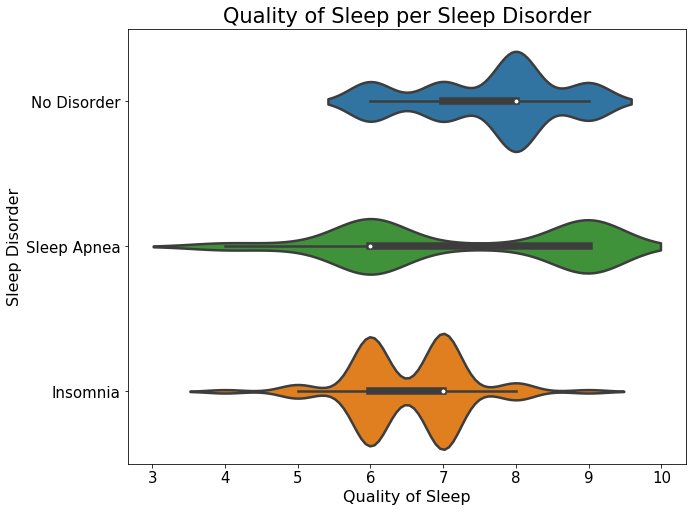

In [52]:
sns.violinplot(x='Quality of Sleep', y='Sleep Disorder', data=df, bw=0.3, palette=custom_palette, linewidth=2.5)

plt.title('Quality of Sleep per Sleep Disorder')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Disorder')

plt.show()

- Violinplot: Permite ver a distribuição de probabilidades para cada grupo. A escala é separada para cada grupo (ex: escalas da nota 7 de cada grupo não representa a escala real)
- A partir do gráfico, nota-se que:
    1. Pessoas sem distúrbio do sono relataram uma qualidade de sono de no mínimo 6;
    2. Pessoas que relatam ter apneia do sono possuem uma qualidade do sono mais distribuido;
    3. A grande maioria das pessoas que sofrem de insônia tem qualidade de sono entre 6 e 7.
    4. Em relação às medianas, tem-se: None = 8; Insomnia = 7; Apnea = 6.

#### 2.1.2. Nível de estresse x Distúrbio do sono

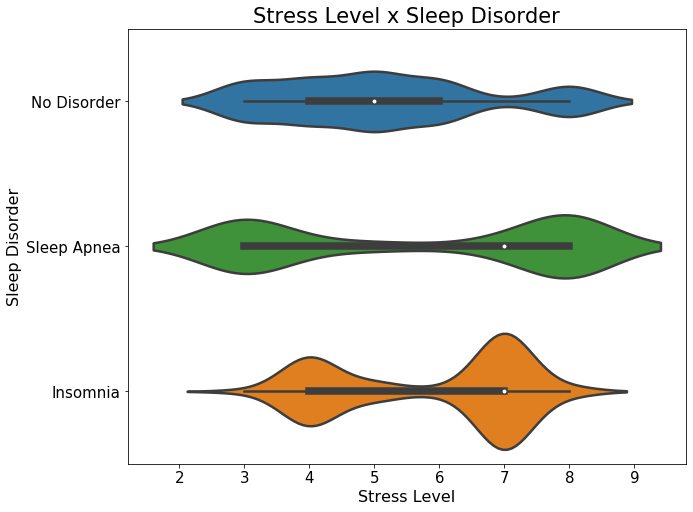

In [53]:
sns.violinplot(x='Stress Level', y='Sleep Disorder', data=df, bw=0.3, palette=custom_palette, linewidth=2.5)

plt.title('Stress Level x Sleep Disorder')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Disorder')

plt.show()

#### 2.1.3. Ocupação x Distúrbio do sono

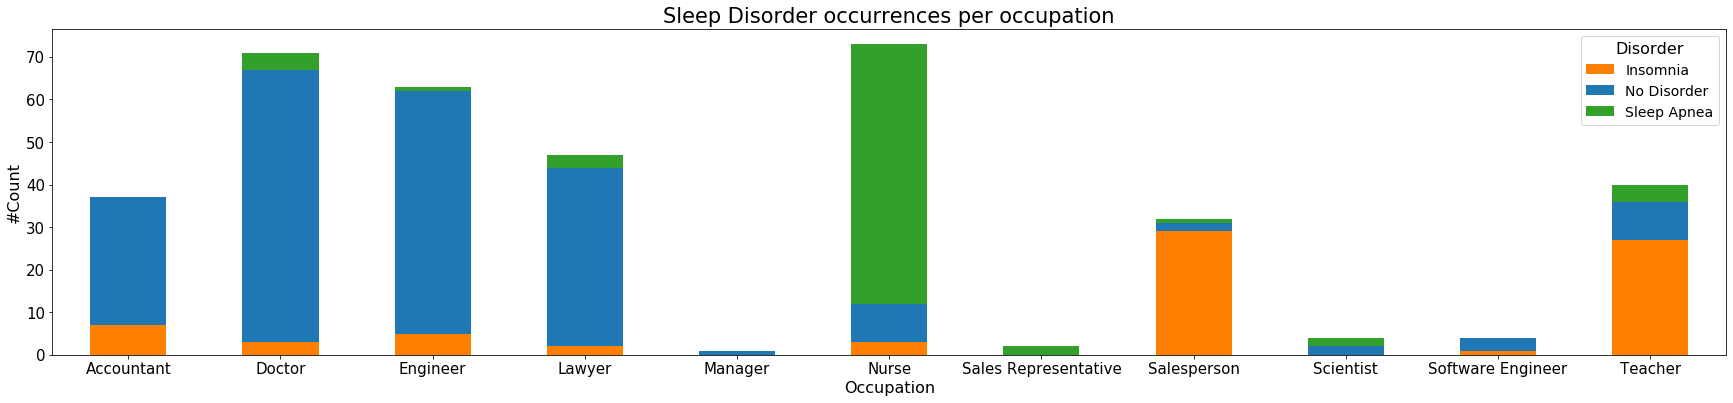

In [22]:
df_occupation_count = df.groupby("Occupation")['Sleep Disorder'].value_counts().unstack(fill_value=0)

ax = df_occupation_count.plot(
    kind='bar', 
    stacked=True, 
    figsize=(30, 6), 
    color=[custom_palette[col] for col in df_occupation_count.columns]
)

plt.title('Sleep Disorder occurrences per occupation')
plt.xlabel('Occupation')
plt.ylabel('#Count')
plt.xticks(rotation=0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Disorder')

plt.show()

- Enfermeiros, vendedores e professores parecem apresentar uma tendência maior para distúrbios de sono;
    - Em especial, enfermeiros tendem a ter mais apneia do sono e vendedores e professores tendem a ter mais insônia;
- Contadores, médicos, engenheiros e advogados tendem a ter menos problemas de sono;
- Demais profissões têm uma amostra muito pequena para se ter alguma conclusão.

#### 2.1.5. Índice de massa corpórea e distúrbios do sono

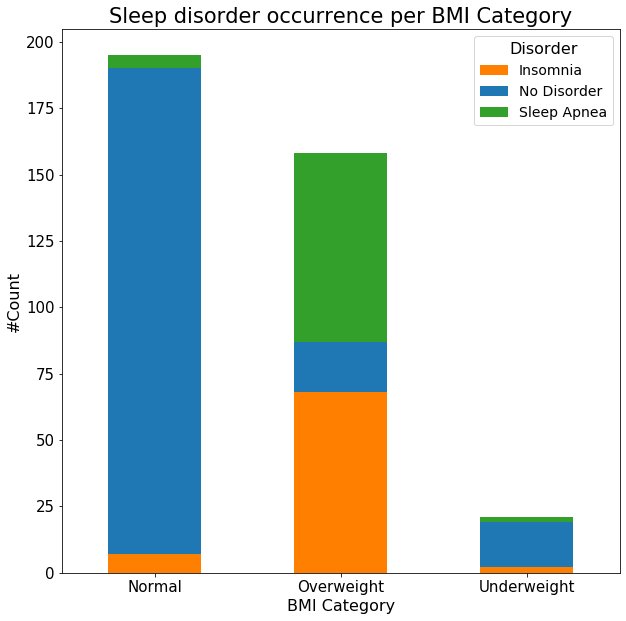

In [38]:
df_bmi_count = df.copy()
df_bmi_count = df_bmi_count.groupby("BMI Category")['Sleep Disorder'].value_counts().unstack(fill_value=0)

ax = df_bmi_count.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 10), 
    color=[custom_palette[col] for col in df_bmi_count.columns]
)

plt.title('Sleep disorder occurrence per BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('#Count')
plt.xticks(rotation=0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Disorder')

plt.show()

- Pessoas acima do peso ou obesas parecem ter mais chance de problemas de sono

#### 2.1.6. Idade x Distúrbio do sono

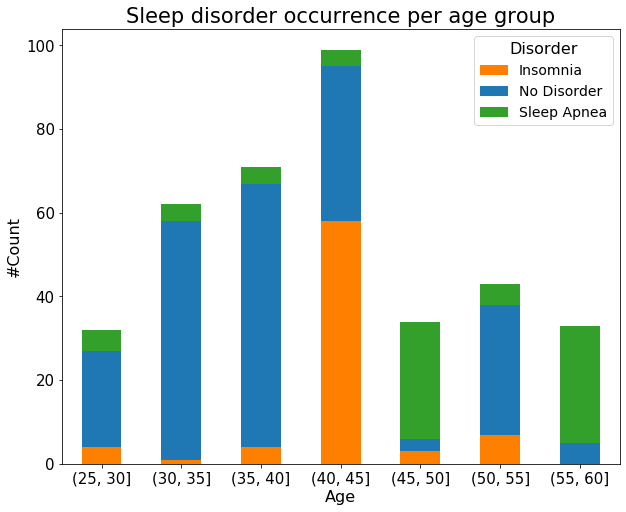

In [24]:
bins = range(25, 65, 5)

df_temp = df.copy()
df_temp['Age Group'] = pd.cut(df_temp['Age'], bins=bins)

pivot_df = df_temp.pivot_table(index='Age Group', columns='Sleep Disorder', aggfunc='size', fill_value=0)

ax = pivot_df.plot(
    kind='bar', 
    stacked=True, 
    alpha=1, 
    color=[custom_palette[col] for col in pivot_df.columns]
)

plt.title('Sleep disorder occurrence per age group')
plt.xlabel('Age')
plt.ylabel('#Count')
plt.legend(title='Disorder')
plt.xticks(rotation=0)

plt.show()

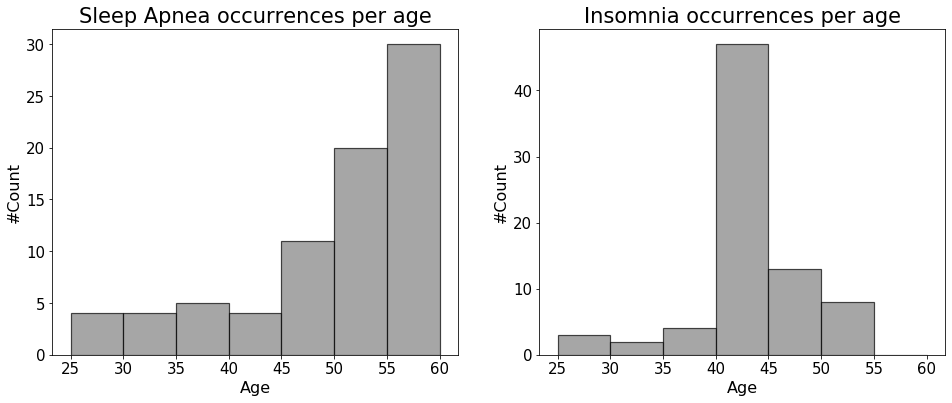

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

df_age = df[df["Sleep Disorder"] == "Sleep Apnea"]["Age"]
ax1.hist(df_age, alpha=0.7, bins=np.arange(25, 65, 5), edgecolor='black', linewidth=1.2, color='gray')

ax1.set_title('Sleep Apnea occurrences per age')
ax1.set_xlabel('Age')
ax1.set_ylabel('#Count')

df_age = df[df["Sleep Disorder"] == "Insomnia"]["Age"]
ax2.hist(df_age, alpha=0.7, bins=np.arange(25, 65, 5), edgecolor='black', linewidth=1.2, color ='gray')

ax2.set_title('Insomnia occurrences per age')
ax2.set_xlabel('Age')
ax2.set_ylabel('#Count')
plt.show()

- Insônia parece se concentrar mais em pessoas com idade entre 40 e 45 anos;
- A apneia do sono tende a afetar pessoas mais velhas.

#### 2.1.7. Batimento cardíaco x Distúrbio do sono

Text(0.5, 1.0, 'Heart Rate per Sleep Disorder')

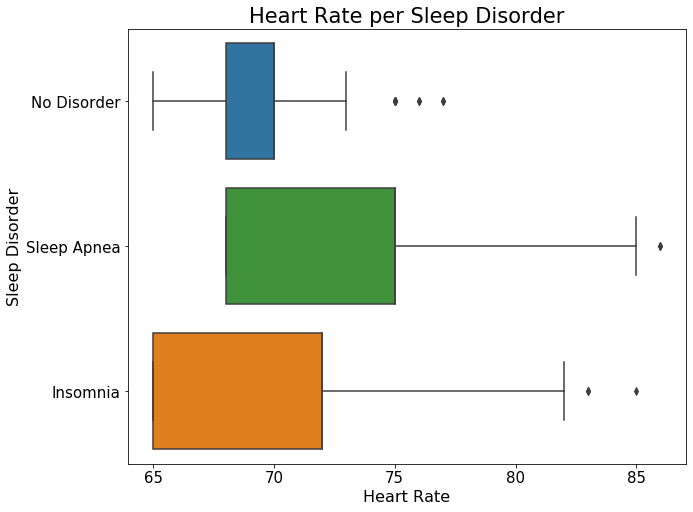

In [26]:
sns.boxplot(data=df, x="Heart Rate", y="Sleep Disorder", palette=custom_palette)
plt.title('Heart Rate per Sleep Disorder')

Heart rate outlier: x > 78.0


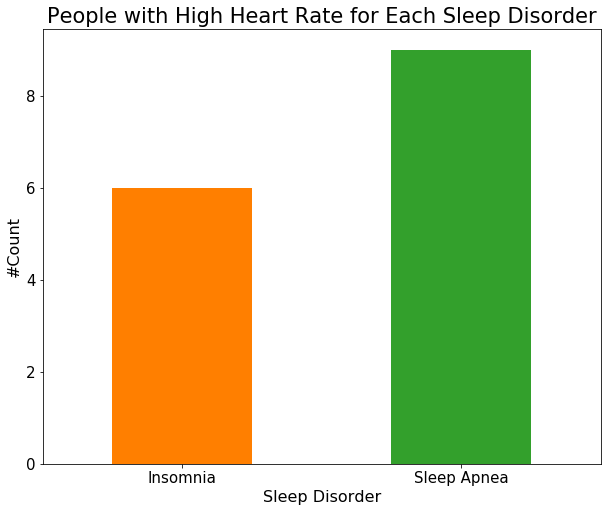

In [68]:
# Outlier analysis
q3 = df["Heart Rate"].quantile(0.75)
q1 = df["Heart Rate"].quantile(0.25)
iqr = q3 - q1
upper_threshold = q3 + 1.5 * iqr
print(f"Heart rate outlier: x > {upper_threshold}")

df_heart_rate_outliers = df[df["Heart Rate"] > upper_threshold]
high_heart_rate_counts = df_heart_rate_outliers.groupby('Sleep Disorder').size()
high_heart_rate_counts.plot(kind='bar', color=[custom_palette["Insomnia"], custom_palette["Sleep Apnea"]])
plt.title('People with High Heart Rate for Each Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('#Count')
plt.xticks(rotation=0)
plt.show()

Raramente pessoas sem distúrbio do sono possuem um batimento cardíaco elevado. Já nos casos de insônia e apneia, um dos quartis possuem um batimento cardíaco mais elevado

#### 2.1.8. Duração do sono e distúrbios do sono

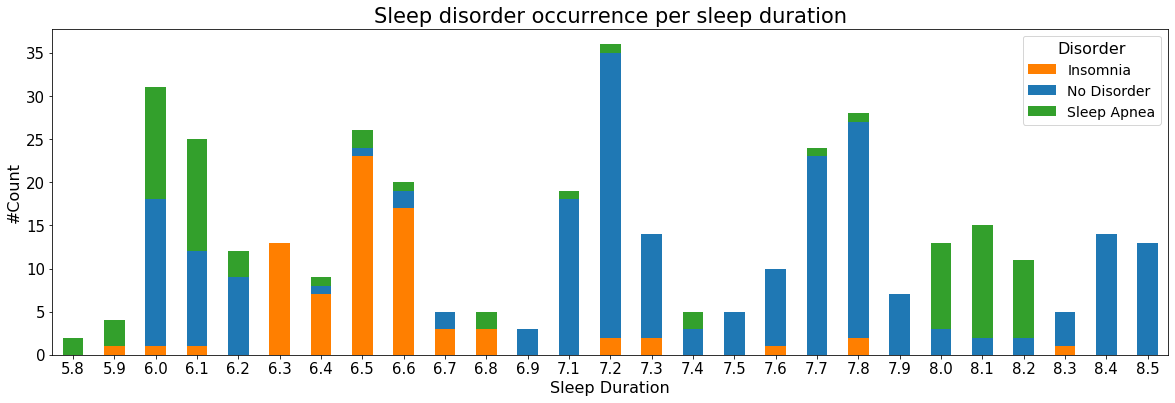

In [27]:
df_sleep_duration_count = df.groupby("Sleep Duration")['Sleep Disorder'].value_counts().unstack(fill_value=0)

ax = df_sleep_duration_count.plot(
    kind='bar', 
    stacked=True, 
    figsize=(20, 6), 
    color=[custom_palette[col] for col in df_sleep_duration_count.columns]
)

plt.title('Sleep disorder occurrence per sleep duration')
plt.xlabel('Sleep Duration')
plt.ylabel('#Count')
plt.xticks(rotation=0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Disorder')

plt.show()

É possível identificar algumas tendências, mas a visualização está muito poluída.
Inseriu-se então uma nova coluna ("Adequate Sleep"), seguindo a recomendação de pelo menos 7 horas de sono diárias para adultos (como o valor máximo do dataset é de 9 horas, que está dentro de um limite recomendado, não se utilizou um limiar máximo)

True     219
False    155
Name: Adequate Sleep, dtype: int64


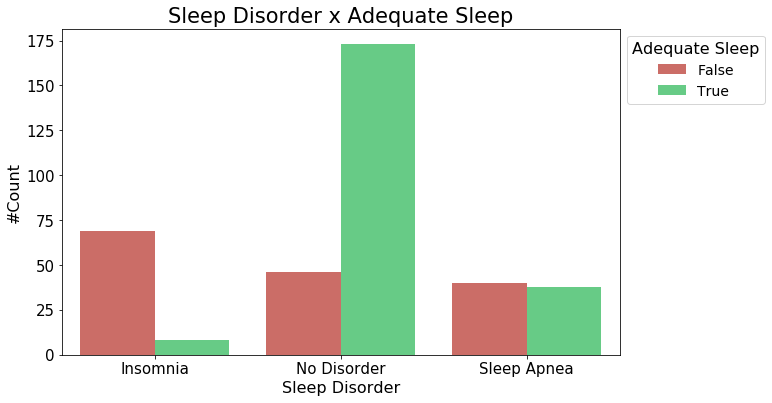

In [28]:
df["Adequate Sleep"] = df["Sleep Duration"].apply(lambda x: True if x >= 7 else False)
print(df["Adequate Sleep"].value_counts())

adequate_sleep_df = df.groupby('Sleep Disorder')['Adequate Sleep'].value_counts().reset_index(name='Counts')
plt.figure(figsize=(10, 6))
sns.barplot(data=adequate_sleep_df,x='Sleep Disorder',y='Counts', hue='Adequate Sleep', alpha=1, width=0.8, palette=custom_palette) 
plt.title('Sleep Disorder x Adequate Sleep')
plt.xlabel('Sleep Disorder')
plt.ylabel('#Count')
plt.xticks(rotation=0)
plt.legend(title="Adequate Sleep", loc='upper left',bbox_to_anchor=(1, 1))
plt.show()

Agora, fica mais evidente que a maioria das pessoas sem distúrbios de sono dormem uma quantidade de sonos adequada. Já pessoas que sofrem algum distúrbio do sono têm uma maior tendência a ter uma quantidade de horas de sono inadequada.

#### 2.1.9. Gênero e distúrbios do sono

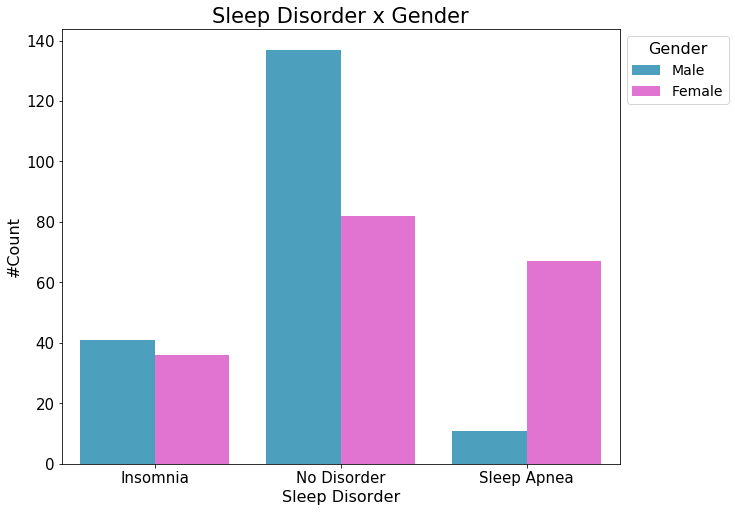

In [29]:
gender_df = df.groupby('Sleep Disorder')['Gender'].value_counts().reset_index(name='Counts')
sns.barplot(data=gender_df,x='Sleep Disorder',y='Counts', hue='Gender', alpha=1,width=0.8, palette=custom_palette) 
plt.title('Sleep Disorder x Gender')
plt.xlabel('Sleep Disorder')
plt.ylabel('#Count')
plt.xticks(rotation=0)
plt.legend(title="Gender", loc='upper left',bbox_to_anchor=(1, 1))
plt.show()

- Mulheres parecem ter maior tendência a ter apneia do sono. No entanto, um possível motivo para tal resultado é o fato de que o dataset possui um grande número de enfermeiras acima do peso. Assim, é mais provável que o IMC é o que mais tem relação com a apneia do sono

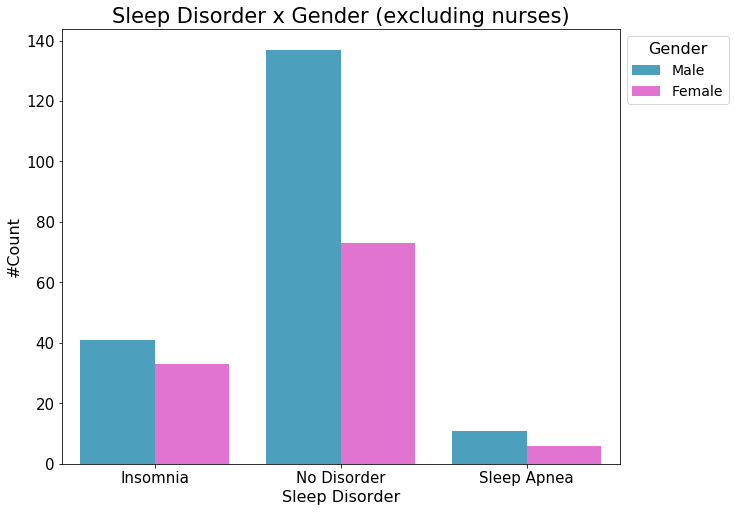

In [30]:
gender_df = df[~(df["Occupation"] == "Nurse")].groupby('Sleep Disorder')['Gender'].value_counts().reset_index(name='Counts')
sns.barplot(data=gender_df,x='Sleep Disorder',y='Counts', hue='Gender', alpha=1, width=0.8, palette=custom_palette) 
plt.title('Sleep Disorder x Gender (excluding nurses)')
plt.xlabel('Sleep Disorder')
plt.ylabel('#Count')
plt.xticks(rotation=0)
plt.legend(title="Gender", loc='upper left',bbox_to_anchor=(1, 1))
plt.show()

In [82]:
df_apnea = df[df["Sleep Disorder"] == 'Sleep Apnea']

n_nurse = df_apnea[df_apnea["Occupation"] == 'Nurse'].shape[0]
n_overweight = df_apnea[df_apnea["BMI Category"] == 'Overweight'].shape[0]
n_female = df_apnea[df_apnea["Gender"] == "Female"].shape[0]

n_nurse_overweight = df_apnea[(df_apnea["Occupation"] == 'Nurse') & (df_apnea["BMI Category"] == 'Overweight')].shape[0]
n_nurse_female = df_apnea[(df_apnea["Gender"] == "Female") & (df_apnea["Occupation"] == 'Nurse')].shape[0]
n_female_overweight = df_apnea[(df_apnea["Gender"] == "Female") & (df_apnea["BMI Category"] == 'Overweight')].shape[0]

n_all = df_apnea[(df_apnea["Gender"] == "Female") & (df_apnea["Occupation"] == 'Nurse') & (df_apnea["BMI Category"] == 'Overweight')].shape[0]

print(f"Number of people with sleep apnea: {df_apnea.shape[0]}")
print(f"Number of nurses with sleep apnea: {n_nurse}")
print(f"Number of females with sleep apnea: {n_female}")
print(f"Number of overweight people with sleep apnea: {n_overweight}")

print(f"Number of nurses overweight with sleep apnea: {n_nurse_overweight}")
print(f"Number of female nurses with sleep apnea: {n_nurse_female}")
print(f"Number of female overweight with sleep apnea: {n_female_overweight}")

print(f"Number of intersections: {n_all}")

Number of people with sleep apnea: 78
Number of nurses with sleep apnea: 61
Number of females with sleep apnea: 67
Number of overweight people with sleep apnea: 71
Number of nurses overweight with sleep apnea: 59
Number of female nurses with sleep apnea: 61
Number of female overweight with sleep apnea: 64
Number of intersections: 59


#### 2.1.10. Número de passos e distúrbios do sono

Classificação: https://pubmed.ncbi.nlm.nih.gov/14715035/ (fonte)
- <5000: Sedentary
- 5000-7499: Low active
- 7500-9999: Somewhat active
- ">9999: Active

In [31]:
bins = [0, 4999, 7499, 9999, float('inf')]
labels = ['Sedentary', 'Low active', 'Somewhat active', 'Active']

df['Active level'] = pd.cut(df['Daily Steps'], bins=bins, labels=labels, right=False)
df['Active level'].value_counts()
df_active = df.groupby('Active level')['Quality of Sleep'].value_counts().reset_index(name='Counts')

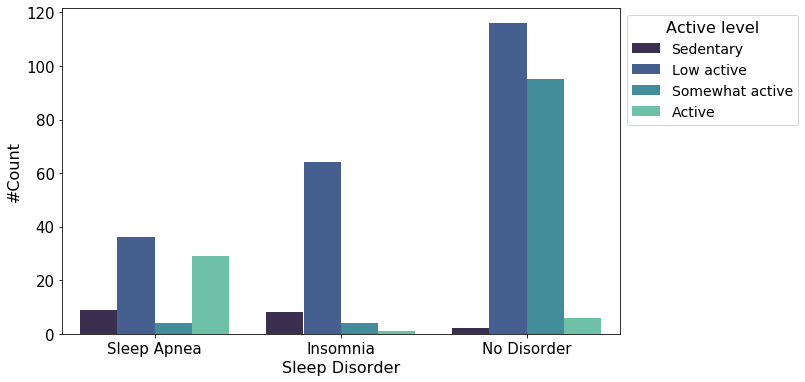

In [32]:
df_active_disorder = df.groupby('Active level')['Sleep Disorder'].value_counts().reset_index(name='Counts')
plt.figure(figsize=(10, 6))
sns.barplot(data=df_active_disorder,x='Sleep Disorder',y='Counts', hue='Active level', alpha=1, width=0.8, palette=sns.color_palette("mako", n_colors=4)) 
plt.xlabel('Sleep Disorder')
plt.ylabel('#Count')
plt.xticks(rotation=0)
plt.legend(title="Active level", loc='upper left',bbox_to_anchor=(1, 1))
plt.show()

#### 2.1.11. Quantidade de exercício físico e distúrbios do sono

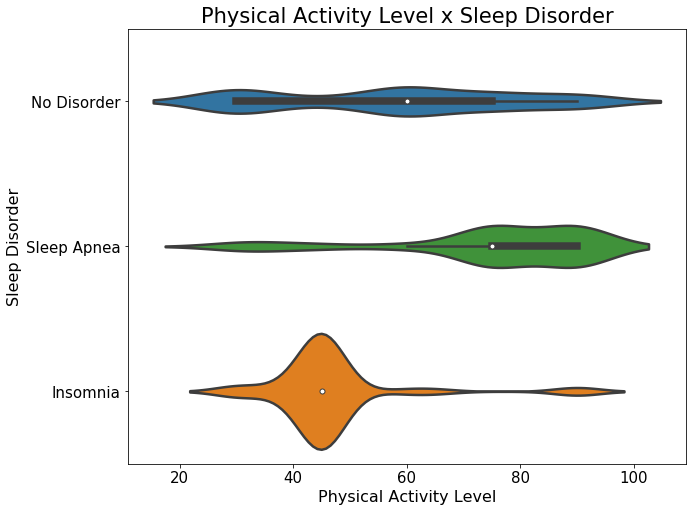

In [55]:
sns.violinplot(x='Physical Activity Level', y='Sleep Disorder', data=df, bw=0.35, palette=custom_palette, linewidth=2.5)

plt.title('Physical Activity Level x Sleep Disorder')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Disorder')

plt.show()

### 2.2. Conclusões

- Apneia do sono:
    - Mais acentuado a partir dos 45 anos
    - Pessoas acima do peso têm mais tendência a sofrerem desse problema (uma vez que esse distúrbio está associado com a obstrução das vias aéreas)
    - Quantidade de sono mediana abaixo quando comparado com pessoas normais
- Insônia:
    - Mais concentrado na faixa dos 40-45 anos (ao contrário da apneia do sono, que está relacionada com causas mais fisiológicas, as quais vão se deteriorando conforme a idade, a insônia possui um fator psicológico mais relacionado)
    - Principalmente vendedores e professores
    - Maioria dos casos tem duração do sono abaixo do recomendado (reflexo do principal sintoma da doença)
    - Assim como a apneia, pessoas acima do peso têm mais tendência a sofrerem desse problema (a partir das análises, há indícios que estar acima do peso contribui para o desenvolvimento de problemas relacionados ao sono)
    - Tendem a realizar menos atividades físicas